Dataset obtained from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

EDA logic and code inspired by the following:
* https://www.kaggle.com/code/anerisavani/life-expectancy-eda/notebook
* https://www.kaggle.com/code/premdj/eda-life-expetancy

In [4]:
# imports
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize

In [5]:
# read data
life_expectancy = pd.read_csv('Life Expectancy Data.csv')
life_expectancy.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
# rename columns to be standardized
life_expectancy.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

Num unique in Country: 193


<AxesSubplot:xlabel='Status', ylabel='count'>

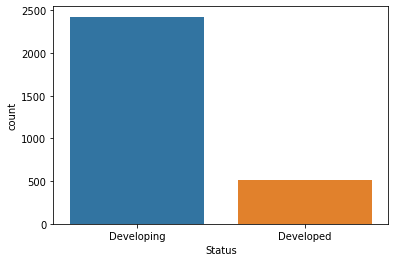

In [11]:
# lets take a look at the categorical features (country, status)
print("Num unique in Country: {}".format(life_expectancy.Country.nunique()))
sns.countplot(x='Status', data=life_expectancy)

Some things of note:
* There are too many unique countries for the them to be categorical variables
    * We'll want to convert them to numbers when it comes to ML
* There are way more developing countries than there are developed ones.
    * We'll want to make sure that the training and testing datasets have a correct proportion of data (i.e. we don't want training set to be all developing and testing set to be all developed)